In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [3]:
df.shape

(398, 9)

In [4]:
# load / clean / reshape dataset
df = pd.read_csv("auto-mpg.csv")
temp = df['mpg']
df = df.drop(columns=['mpg','car name']) # remove car name col
df = pd.concat([df, temp], axis=1)

# remove rows with ?
cols = list(df.columns)
for col in cols:
    df = df[df[col] != '?']
    
# if column names have leading / trailing white space
new_cols = []
for col_name in list(df.columns):
    new_cols.append(col_name.strip())
df.columns = new_cols

df.head()
df.shape

/Users/andrewjli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(392, 8)

In [5]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [6]:
# calculate adjusted r-squared
def adjusted_r_squared(r_square, m, n):
    right = ((m - 1) * (1 - r_square)) / (m - (n + 1))
    return 1 - right

In [8]:
def build_model_eval(X, y, activation1='relu', activation2='relu', activation3='linear'):
    """
    This function is to build a 3L NN model using an X matrix and y array, evaluate them using R^2, R^2 bar,
    and R^2 CV (5-fold), and these 3 quality of fit measures are returned.

    Uses SGD to update weights.

    Notes:
    - The X and y inputs must by numpy arrays (use .values for DataFrame objects)
    - If X is not a 2d matrix and is a 1d matrix instead (only 1 feature), then
      use X = np.reshape(X, (-1, 1)) to reshape the data before passing it to scale
    """


    # reshape
    y = np.reshape(y, (-1, 1))

    # scale features
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    scaler_x.fit(X)
    scaler_y.fit(y)
    xscale = scaler_x.transform(X)
    yscale = scaler_y.transform(y)
    
    # create model
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], activation=activation1))
    model.add(Dense(10, activation=activation2))
    model.add(Dense(1, activation=activation3))
    
    # make learning rate
    opt = SGD(lr=0.01)

    # compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
    
    # fit the model on dataset (mini batch)
    history = model.fit(xscale, yscale, epochs=150, batch_size=10, verbose=0)
    
    # predict
    predictions = model.predict(xscale)
    predictions = scaler_y.inverse_transform(predictions)
    
    # calculate r-squared
    r_squared = r2_score(y, predictions)
    
    # calculate adjusted r-squared
    adj_r_squared = adjusted_r_squared(r_squared, X.shape[0], X.shape[1])
    
    # calculate r-squared cv
    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)

    # calculate r-squared cross validated
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_scores = []
    
    for train, test in kfold.split(xscale, yscale):
    # create model
        model = Sequential()
        model.add(Dense(X.shape[1], input_dim=X.shape[1], activation=activation1))
        model.add(Dense(10, activation=activation2))
        model.add(Dense(1, activation=activation3))

        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

        # fit the model on dataset (mini batch)
        model.fit(xscale[train], yscale[train], epochs=150, batch_size=10, verbose=0)

        # make predictions
        predictions = model.predict(xscale[test])
        predictions = scaler_y.inverse_transform(predictions)

        # calculate r-squared
        r2 = r2_score(y[test], predictions)
        cv_scores.append(r2)
        
    cv_r_squared = sum(cv_scores) / len(cv_scores)
    return r_squared, adj_r_squared, cv_r_squared


    
    

cylinders


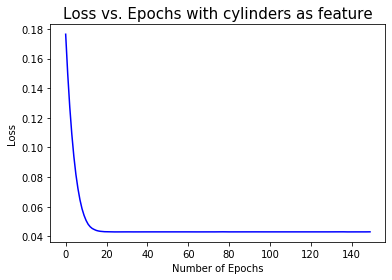

cylinders R^2:  -3.318266609930731e-06 R^2 adjusted:  -0.0025674293390884895 R^2 CV:  0.22099621693227198
displacement


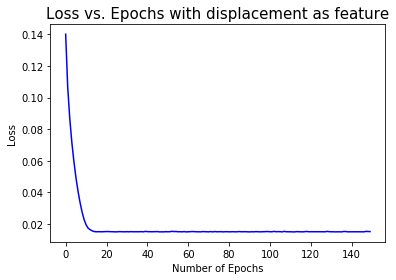

displacement R^2:  0.6493931666429498 R^2 adjusted:  0.648494174762547 R^2 CV:  0.24019854517826986
horsepower


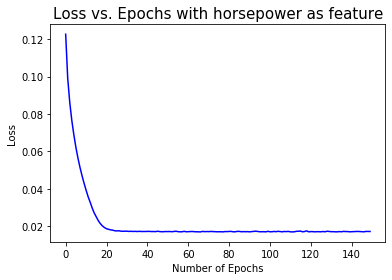

horsepower R^2:  0.599785204713673 R^2 adjusted:  0.5987590129308876 R^2 CV:  0.23881281274547156
weight


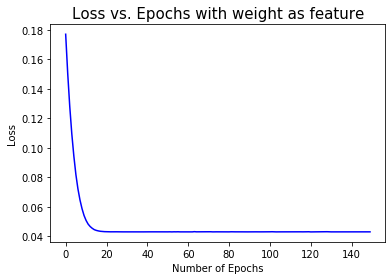

weight R^2:  -6.955485873483269e-06 R^2 adjusted:  -0.002571075884555185 R^2 CV:  0.4020011368728012
acceleration


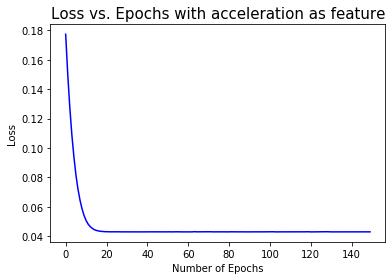

acceleration R^2:  -6.9541952931739814e-06 R^2 adjusted:  -0.002571074590665745 R^2 CV:  0.08799863469566147
model year


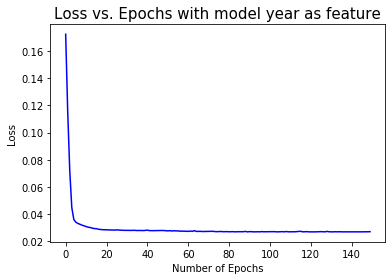

model year R^2:  0.37180570781855216 R^2 adjusted:  0.37019495322321505 R^2 CV:  0.25684404440980685
origin


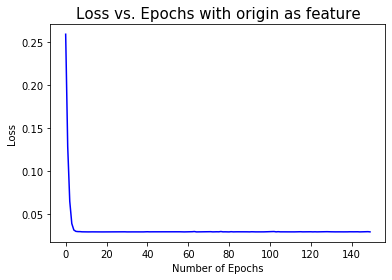

origin R^2:  0.33137691917661805 R^2 adjusted:  0.32966250102066064 R^2 CV:  0.06150672133715231
Best single feature:  weight


In [9]:
# first start with 1 feature and run the model 'n' number of times

features = list(df.columns)[:-1] # take everything but the output variable

feature_dict = dict() # will store R^2 and R^2 bar scores for each feature

for feature in features:
    
    # add feature to dictionary
    feature_dict[feature] = [] # empty list for each feature (will add R^2 and R^2 bar)

    X_col_index = df.columns.get_loc(feature)
    dataset = df.values
    X = dataset[:,X_col_index]
    y = dataset[:,(df.shape[1])-1]

    # reshape
    X = np.reshape(X, (-1, 1))
    y = np.reshape(y, (-1, 1))

    # scale features
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    scaler_x.fit(X)
    scaler_y.fit(y)
    xscale = scaler_x.transform(X)
    yscale = scaler_y.transform(y)

    # create model
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # make learning rate
    opt = SGD(lr=0.01)

    # compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    # fit the model on dataset (mini batch)
    history = model.fit(xscale, yscale, epochs=150, batch_size=10, verbose=0)
    
    ### TEMP
    print(feature)

    # plot loss function vs epochs
    plt.plot(history.history['loss'], color='blue')
    plt.title('Loss vs. Epochs with ' + str(feature) +  ' as feature', size='15')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.show()

    # predict
    predictions = model.predict(xscale)
    predictions = scaler_y.inverse_transform(predictions)

    # calculate r-squared
    r_squared = r2_score(y, predictions)
    feature_dict[feature].append(r_squared)

    # calculate adjusted r-squared
    adj_r_squared = adjusted_r_squared(r_squared, X.shape[0], X.shape[1])
    feature_dict[feature].append(adj_r_squared)
    
    # calculate r-squared cv
    seed = 7
    np.random.seed(seed)

    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_scores = []
    for train, test in kfold.split(xscale, yscale):
        # create model
        model = Sequential()
        model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
        model.add(Dense(10, activation='relu'))
        model.add(Dense(1, activation='linear'))

        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

        # fit the model on dataset (mini batch)
        model.fit(xscale[train], yscale[train], epochs=150, batch_size=10, verbose=0)

        # make predictions
        predictions = model.predict(xscale[test])
        predictions = scaler_y.inverse_transform(predictions)

        # calculate r-squared
        r2 = r2_score(y[test], predictions)
        cv_scores.append(r2)
        
    cv_r_squared = sum(cv_scores) / len(cv_scores)
    feature_dict[feature].append(cv_r_squared)
    
    # print out
    print(feature, end=" ")
    print("R^2: ", feature_dict[feature][0], end=" ")
    print("R^2 adjusted: ", feature_dict[feature][1], end=" ")
    print("R^2 CV: ", feature_dict[feature][2])
    
# selecting best feature by R^2 bar
best_single_feature_items = sorted(feature_dict.items(), key=lambda x: x[1][2], reverse=True)
print("Best single feature: ", best_single_feature_items[0][0])
    


In [10]:
# forward select (fs) process

fs_cols = [best_single_feature_items[0][0]]

# master lists for measures of fit (already include fits for first best selected feature)
r2_master = [best_single_feature_items[0][1][0]]
r2_adj_master = [best_single_feature_items[0][1][1]]
r2_cv_master = [best_single_feature_items[0][1][2]]

counter = len(features) - 1 # -1 because one of the attributes is already in the forward sel list
step_counter = 1

while counter != 0:
    
    # adding forward step features to lists, and their measures of fit
    fs_feature_list = []
    r2_list = []
    r2_adj_list = []
    r2_cv_list = []
    
    print("\n" + "forward step #: " + str(step_counter))
        
    for feature in features:
        
        if not feature in fs_cols:
            # forward step
            # make copy of original list then add new feature            
            temp_list = fs_cols.copy()
            temp_list.append(feature)
            
            # df with additional new feature
            temp_df = pd.DataFrame()
            for col in temp_list:
                temp_df = pd.concat([temp_df, df[col]], axis=1)
                
                
            # organize data with temp_df
            dataset = temp_df.values
            X = dataset[:,:(temp_df.shape[1])]
            y = df.iloc[:,(df.shape[1])-1].values # y stays the same always
            
            r2, r2_bar, r2_cv = build_model_eval(X, y)
            
            print(temp_list)
            print("r2:", r2, "r2_bar", r2_bar, "r2_cv", r2_cv)
            
            fs_feature_list.append(feature)
            r2_list.append(r2)
            r2_adj_list.append(r2_bar)
            r2_cv_list.append(r2_cv)
                

    # add next feature to master list (fs_cols) that has the highest r2_cv
    
    # index of highest r2_cv
    r2_cv_highest = 0
    r2_cv_index = 0
    for i in range(len(r2_cv_list)):
        if r2_cv_list[i] > r2_cv_highest:
            r2_cv_highest = r2_cv_list[i]
            r2_cv_index = i
    
    # feature with highest r2_cv
    feature_highest = fs_feature_list[r2_cv_index]
    
    
    # update master lists
    fs_cols.append(feature_highest)
    r2_master.append(r2_list[r2_cv_index])
    r2_adj_master.append(r2_adj_list[r2_cv_index])
    r2_cv_master.append(r2_cv_list[r2_cv_index])
    
    # counter increments
    counter -= 1
    step_counter += 1
        
        



forward step #: 1
['weight', 'cylinders']
r2: 0.734079089170965 r2_bar 0.7327118865445946 r2_cv 0.684526646810296
['weight', 'displacement']
r2: 0.6951404831777981 r2_bar 0.693573082063031 r2_cv 0.7171481431823383
['weight', 'horsepower']
r2: -6.955485873483269e-06 r2_bar -0.0051483794215334555 r2_cv 0.733005493101406
['weight', 'acceleration']
r2: 0.7144227896916797 r2_bar 0.7129545263996061 r2_cv 0.7149573699620317
['weight', 'model year']
r2: 0.8457721229126036 r2_bar 0.8449791775291209 r2_cv 0.8242717591605615
['weight', 'origin']
r2: 0.7114251514615053 r2_bar 0.7099414761476828 r2_cv 0.6965760945048746

forward step #: 2
['weight', 'model year', 'cylinders']
r2: 0.851972905755451 r2_bar 0.8508283663669622 r2_cv 0.8244819501502881
['weight', 'model year', 'displacement']
r2: 0.8634099910887314 r2_bar 0.8623538827724071 r2_cv 0.8338804159527561
['weight', 'model year', 'horsepower']
r2: 0.8780397442084407 r2_bar 0.8770967525399492 r2_cv 0.8573925513931725
['weight', 'model year', '

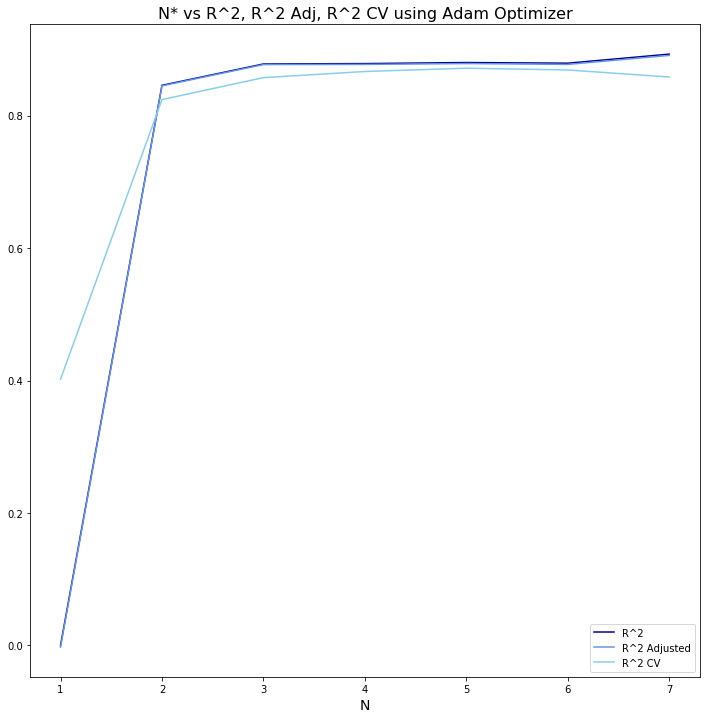

N*: 5
Highest R^2 CV: 0.8716


In [11]:
# plot results
n = range(1,len(fs_cols)+1)
plt.figure(figsize=(12,12))
plt.plot(n, r2_master, color='darkblue', label='R^2')
plt.plot(n, r2_adj_master, color='cornflowerblue', label='R^2 Adjusted')
plt.plot(n, r2_cv_master, color='skyblue', label='R^2 CV')
plt.xlabel("N", size='14')
plt.title("N* vs R^2, R^2 Adj, R^2 CV using Adam Optimizer", size='16')
plt.legend(loc='lower right')
plt.show()

# calculate n*
highest_index = 0
highest_value = 0
for i in range(len(r2_cv_master)):
    if r2_cv_master[i] > highest_value:
        highest_value = r2_cv_master[i]
        highest_index = i+1
print("N*:", highest_index)
print("Highest R^2 CV: {:0.4f}".format(highest_value))

In [12]:
# Print outs for summary
for i in range(len(r2_master)):
    print("Number of features:", i+1, end=" - ")
    print("R^2: {:0.4f}".format(r2_master[i]), end=" ")
    print("R^2 Adj: {:0.4f}".format(r2_adj_master[i]), end=" ")
    print("R^2 CV: {:0.4f}".format(r2_cv_master[i]))
    
    

Number of features: 1 - R^2: -0.0000 R^2 Adj: -0.0026 R^2 CV: 0.4020
Number of features: 2 - R^2: 0.8458 R^2 Adj: 0.8450 R^2 CV: 0.8243
Number of features: 3 - R^2: 0.8780 R^2 Adj: 0.8771 R^2 CV: 0.8574
Number of features: 4 - R^2: 0.8786 R^2 Adj: 0.8774 R^2 CV: 0.8667
Number of features: 5 - R^2: 0.8802 R^2 Adj: 0.8787 R^2 CV: 0.8716
Number of features: 6 - R^2: 0.8792 R^2 Adj: 0.8773 R^2 CV: 0.8690
Number of features: 7 - R^2: 0.8929 R^2 Adj: 0.8909 R^2 CV: 0.8583
